In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

In [3]:
from SepMe.processing.batchprocessing import *
batch_file = '../data/mturk_samples/training_abstract/Batch_3850931_batch_results.csv'
check_file = '../data/orig_data/human_reduced_results.csv'

green = '#029e73'
pink  = '#cc78bc'
blue = '#56b4e9'

SepMe - INFO - MLFLOW_TRACKING_URI - http://localhost:5000


Size after filtering by 1 is (136, 58)
Size after filtering by 2 is (121, 58)
Size after filtering by 3 is (110, 58)
Size after filtering by 4 is (108, 58)
Retain rate for minimum 2 passes is: 96.25% 



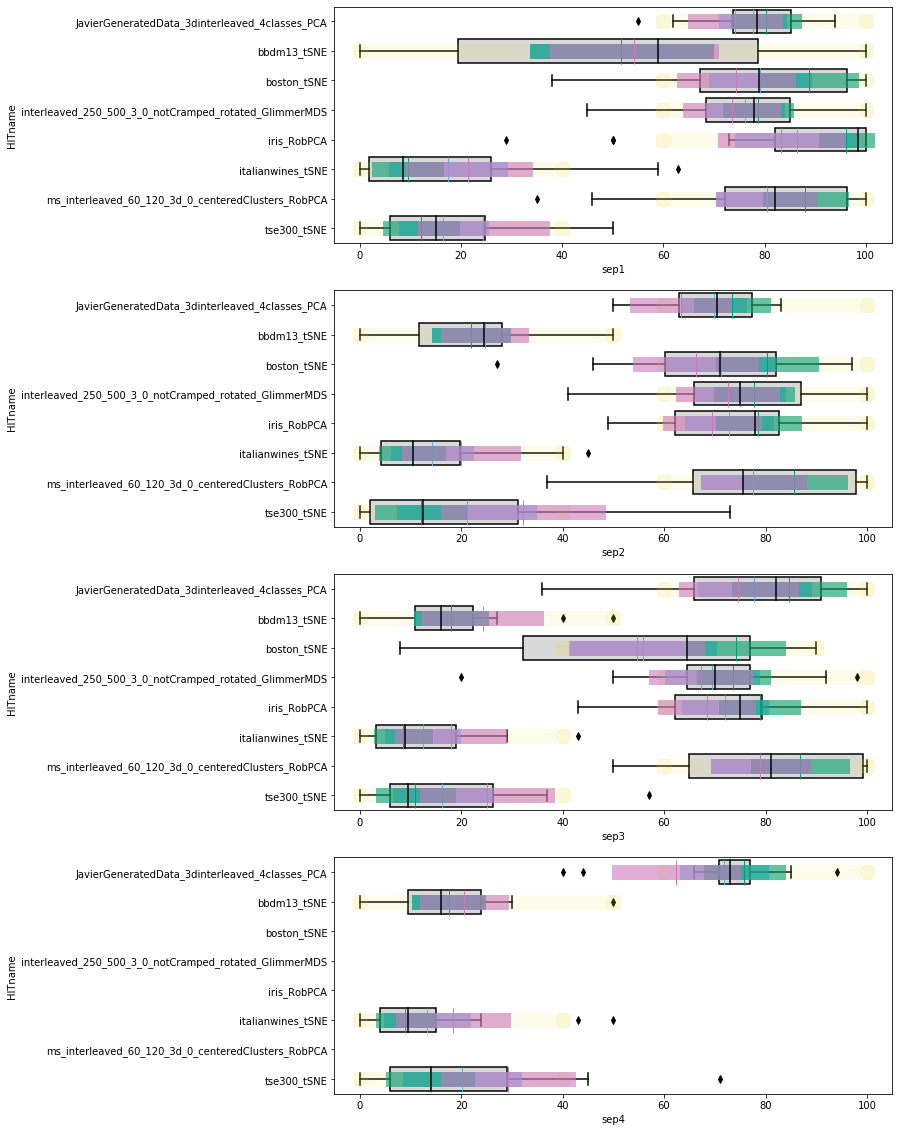

In [4]:
## load with cristina 
batch_file = '../data/mturk_samples/training_abstract/Batch_3850931_batch_results.csv'

df = append_cristina(batch_file)
df_agg = aggregate_batch(df)


df1 = filter_by_sanity(df)
df_agg1 = aggregate_batch(df1)

df2 = self_clean(df, majority=.6, total=20, neg=40, pos=60)
df2 = df2.loc[df2['passes']>2]
df_agg2 = aggregate_batch(df2)


axes = get_plots(df2, df_agg2, figsize=(10,20), alpha=1,col='black', con_col = blue)


plot_extra(axes, df1, df_agg1, green)
plot_extra(axes, df, df_agg, pink)


Retain rate for minimum 2 passes is: 94.58333333333333% 



/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/Users/morarica/miniconda3/envs/SepMe/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


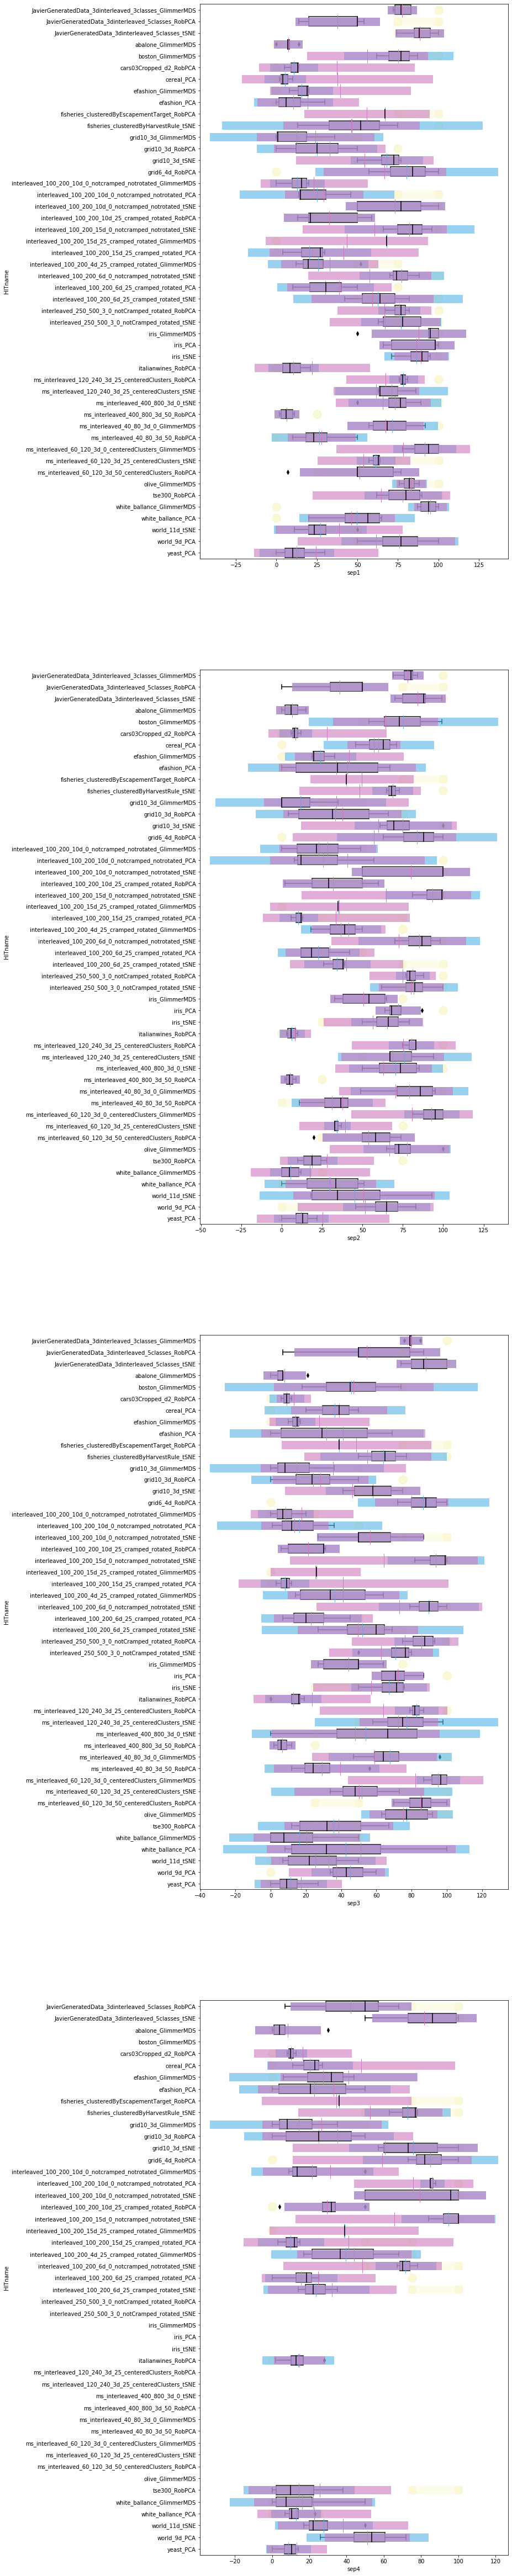

In [5]:
#filter by michael
batch_file = '../data/mturk_samples/sample_money/Batch_3848359_batch_results.csv'
df = append_test_data(batch_file, check_file)
df_agg = aggregate_batch(df)

df2 = self_clean(df, majority=.5, total=5, neg=40, pos=60)
df2 = df2.loc[df2['passes']>3]

df_agg2 = aggregate_batch(df2)


axes = get_plots(df2, df_agg2, figsize=(10,85), alpha=0.9, col='black', con_col = blue)

#axes = get_plots(df, df_agg, figsize=(10,25), alpha=0.9, col='black', con_col = 'white')
plot_extra(axes, df, df_agg, pink)



Stats for workers with HITs between 0 and 8:
Total Workers who took the experiment: 43
-------
Average time spent in this experiment: 56.04651162790697
Median time spent in this experiment: 41.5
-------
Percentage of people between (0,15): 0.06
Percentage of people between (15,30): 0.27
Percentage of people between (30,60): 0.35
Percentage of people between (60,120): 0.31
Percentage of people between (120,180): 0.06
Percentage of people between (180,240): 0.0
Percentage of people between (240,300): 0.0



Stats for workers with HITs between 1 and 1:
Total Workers who took the experiment: 25
-------
Average time spent in this experiment: 67.04
Median time spent in this experiment: 63.0
-------
Percentage of people between (0,15): 0.08
Percentage of people between (15,30): 0.12
Percentage of people between (30,60): 0.32
Percentage of people between (60,120): 0.48
Percentage of people between (120,180): 0.04
Percentage of people between (180,240): 0.0
Percentage of people between (240,300

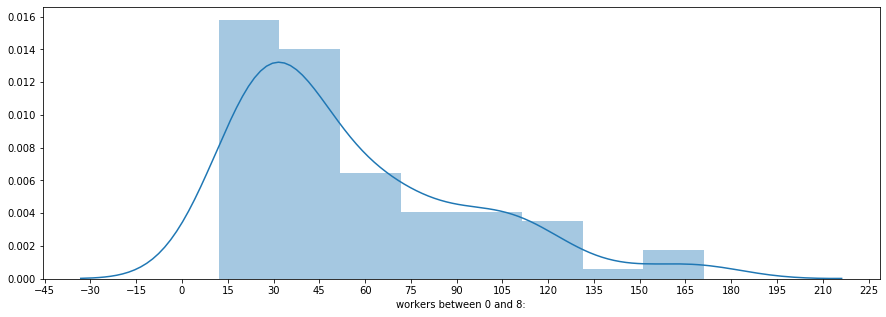

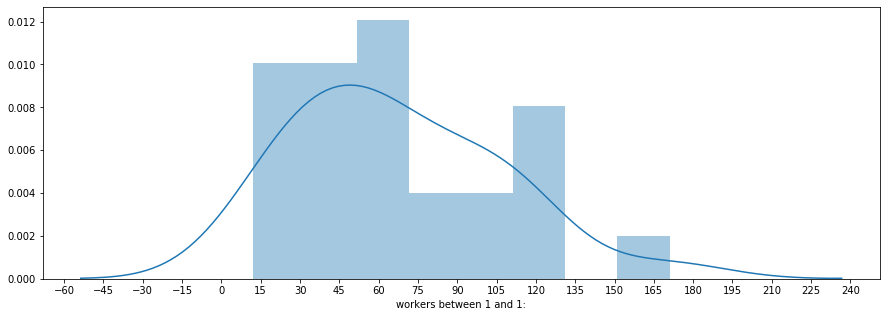

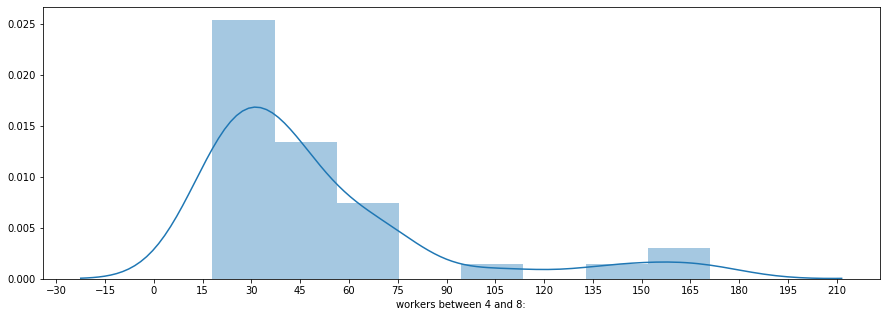

In [6]:
get_slice_stats(df, mmin=0, mmax=8, bins=8)
get_slice_stats(df, mmin=1, mmax=1, bins=8)
#get_slice_stats(df, mmin=2, mmax=4, bins=8)
get_slice_stats(df, mmin=4, mmax=8, bins=8)